# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

We want to conduct simple web scrapping using Beautiful Soup method. Web scrapping is a method that we can use to collect data from the internet / website. For this case, I want to scrap the latest data of 2024 Worldwide Box Office movie earnings gathered from https://www.boxofficemojo.com/year/world/.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [1]:
import requests

url_get = requests.get('https://www.boxofficemojo.com/year/world/')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

Finding the right key involves several steps:
1. From https://www.boxofficemojo.com/year/world/, we can `inspect` the webpage using the F12 shortcut, and then hover the mouse over the data / table that we want to scrap
2. We want to find the `Element` which blocks only the data / table itself but also includes all the rows we want to get
3. After we find the right key / `Element`, we note the signature Element for the Table, in which I get `<'div' class='a-section imdb-scroll-table-inner'>`

In [4]:
table = soup.find('div', attrs={'class':'a-section imdb-scroll-table-inner'})
print(table.prettify()[1:500])

div class="a-section imdb-scroll-table-inner">
 <table class="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated">
  <tr>
   <th class="a-text-right mojo-field-type-rank mojo-sort-column mojo-sortable-column a-nowrap">
    <a class="a-link-normal a-nowrap" href="?sort=rank&amp;ref_=bo_ydw__resort#table" title="Rank">
     <span class="a-color-state">
      Rank
     </span>
     <span class="a-letter-space">
     </span>
     <span class="icon aok-relative


Next, we need to find the row length.

In [5]:
table_all = table.find_all('td', attrs={'class','a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column'})
table_all

[<td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">1</td>,
 <td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">2</td>,
 <td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">3</td>,
 <td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">4</td>,
 <td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">5</td>,
 <td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">6</td>,
 <td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">7</td>,
 <td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">8</td>,
 <td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">9</td>,
 <td class="a-text-right mojo-header-column mojo-trunca

In [6]:
row_length = len(table_all)
row_length

200

We note that there are 200 rows of data after scrapping from the website, which is correct after we crosscheck from the website itself

## Scrapping Process 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

The scrapping process itself involves looping the `'Table'` data that we create before, to extract the whole 200 rows that we found

However, for this particular case, I note that the 'Worldwide', 'Domestic' and 'Foreign' columns has the same HTML format (class= 'a-text-right mojo-field-type-money'), hence we will get the same data for those 3 columns if we dont modify the criteria

Hence, we perform `find_all()` method on the BeautifulSoup object to find all 3 elements that match this criteria: 'a-text-right mojo-field-type-money' and I put it in `money_elements` dataframe. 

Basically, 'Worldwide', 'Domestic', and 'Foreign' metrics are now stored in `money_elements'` Since there are 200 sets of data, 'money_elements' actually contains 600 individual data points.

In [7]:
money_elements = table.find_all('td', attrs='a-text-right mojo-field-type-money')
if len(money_elements) >= 3:
    worldwide = money_elements[0].text.strip()
    domestic = money_elements[1].text.strip()
    foreign = money_elements[2].text.strip()
    print(worldwide)
    print(domestic)
    print(foreign)

$1,650,395,307
$647,045,450
$1,003,349,857


For the loop, we want to extract all the `row_length` for 'Rank', 'Release Group', 'Worldwide', 'Domestic', and 'Foreign' columns and store it in 'temp' dataframe. 

For 'Worldwide', 'Domestic', and 'Foreign' columns, we have to use another method. Imagine `money_elements` as a long list of numbers. These numbers represent movie earnings, divided into three types: worldwide, domestic, and foreign.

The order of the numbers in this list is important. Every three consecutive numbers actually represent one movie. For example:

- The first number of each group of three represents the movie's worldwide earnings.
- The second number is for domestic earnings.
- The third number is for foreign earnings.

-> 1st row: 0 Worldwide | 1 Domestic | 2 Foreign \
-> 2nd row: 3 Worldwide | 4 Domestic | 5 Foreign

So, to get the data we want, we can use this simple trick:
- To get worldwide earnings: Take every 3rd number in the list. So, you'd look at the 0, 3rd, 6th, 9th numbers, and so on.
- To get domestic earnings: Take every 3rd number + 1. So, you'd look at the 4th, 7th, 10th numbers, and so on.
- To get foreign earnings: Take every 3rd number + 2. So, you'd look at the 5th, 8th, 11th numbers, and so on.

In [8]:
temp = []  # Initiating a tuple

for i in range(0, row_length):

    # Scraping process
    # Get Rank
    rank = table.find_all('td', attrs='a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column')[i].text.strip()

    # Get Release Group
    release_group = table.find_all('td', attrs='a-text-left mojo-field-type-release_group')[i].text.strip()

    # Get Worldwide
    worldwide = money_elements[i*3].text.strip().replace('$', '')

    # Get Domestic
    domestic = money_elements[i*3 + 1].text.strip().replace('$', '')

    # Get Domestic
    foreign = money_elements[i*3 + 2].text.strip().replace('$', '')
    
    temp.append((rank, release_group, worldwide, domestic, foreign))
    
temp

[('1', 'Inside Out 2', '1,650,395,307', '647,045,450', '1,003,349,857'),
 ('2', 'Deadpool & Wolverine', '1,217,553,325', '582,732,869', '634,820,456'),
 ('3', 'Despicable Me 4', '887,608,665', '349,667,665', '537,941,000'),
 ('4', 'Dune: Part Two', '711,844,358', '282,144,358', '429,700,000'),
 ('5',
  'Godzilla x Kong: The New Empire',
  '567,650,016',
  '196,350,016',
  '371,300,000'),
 ('6', 'Kung Fu Panda 4', '548,979,132', '193,590,620', '355,388,512'),
 ('7', 'Bad Boys: Ride or Die', '402,517,230', '193,531,836', '208,985,394'),
 ('8',
  'Kingdom of the Planet of the Apes',
  '397,378,150',
  '171,130,165',
  '226,247,985'),
 ('9', 'Twisters', '349,080,100', '250,380,100', '98,700,000'),
 ('10', 'A Quiet Place: Day One', '261,564,938', '138,930,553', '122,634,385'),
 ('11', 'It Ends with Us', '247,221,712', '125,115,541', '122,106,171'),
 ('12', 'Alien: Romulus', '230,455,755', '78,010,406', '152,445,349'),
 ('13', 'The Garfield Movie', '230,288,715', '91,935,184', '138,353,531')

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [9]:
import pandas as pd

df = pd.DataFrame(temp)
df.head()

,0,1,2,3,4
0,1,Inside Out 2,"1,650,395,307","647,045,450","1,003,349,857"
1,2,Deadpool & Wolverine,"1,217,553,325","582,732,869","634,820,456"
2,3,Despicable Me 4,"887,608,665","349,667,665","537,941,000"
3,4,Dune: Part Two,"711,844,358","282,144,358","429,700,000"
4,5,Godzilla x Kong: The New Empire,"567,650,016","196,350,016","371,300,000"


### Data Cleansing

1. First we want to rename / set the header name for each columns
2. We also want to remove the comma from the numeric data so that it can be a integer
3. Check missing / non-numeric values
4. We want to check the data types for each columns

In [10]:
# 1. Set the header name for each columns
imdb = df.set_axis(['Rank', 'Release Group', 'Worldwide', 'Domestic', 'Foreign'], axis=1)
imdb.head()

,Rank,Release Group,Worldwide,Domestic,Foreign
0,1,Inside Out 2,"1,650,395,307","647,045,450","1,003,349,857"
1,2,Deadpool & Wolverine,"1,217,553,325","582,732,869","634,820,456"
2,3,Despicable Me 4,"887,608,665","349,667,665","537,941,000"
3,4,Dune: Part Two,"711,844,358","282,144,358","429,700,000"
4,5,Godzilla x Kong: The New Empire,"567,650,016","196,350,016","371,300,000"


In [11]:
# 2. Remove the comma from Worldwide, Domestic and Foreign columns
imdb = imdb.replace(',','', regex=True)
imdb.head()

,Rank,Release Group,Worldwide,Domestic,Foreign
0,1,Inside Out 2,1650395307,647045450,1003349857
1,2,Deadpool & Wolverine,1217553325,582732869,634820456
2,3,Despicable Me 4,887608665,349667665,537941000
3,4,Dune: Part Two,711844358,282144358,429700000
4,5,Godzilla x Kong: The New Empire,567650016,196350016,371300000


In [12]:
# 3. Check missing / non-numeric values
imdb.isna().sum()

Rank             0
Release Group    0
Worldwide        0
Domestic         0
Foreign          0
dtype: int64

In [13]:
imdb.fillna

<bound method NDFrame.fillna of     Rank                            Release Group   Worldwide   Domestic  \
0      1                             Inside Out 2  1650395307  647045450   
1      2                     Deadpool & Wolverine  1217553325  582732869   
2      3                          Despicable Me 4   887608665  349667665   
3      4                           Dune: Part Two   711844358  282144358   
4      5          Godzilla x Kong: The New Empire   567650016  196350016   
..   ...                                      ...         ...        ...   
195  196  Let's Go! Anpanman: Baikinman and Lulun     3279803          -   
196  197                                  Gondola     3278905          -   
197  198                          Boy Kills World     3269468    2626127   
198  199                            Lucky Winners     3269433          -   
199  200                        Mothers' Instinct     3261763          -   

        Foreign  
0    1003349857  
1     634820456  
2

In [14]:
print(imdb['Worldwide'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())
print(imdb['Domestic'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())
print(imdb['Foreign'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())

0
97
5


There are no missing values (NaN), however, there are many rows with `' - '` values

In [19]:
imdb[['Domestic','Foreign']] = imdb[['Domestic','Foreign']].replace({'-': '0'}, regex=True)
imdb

,Rank,Release Group,Worldwide,Domestic,Foreign
0,1,Inside Out 2,1650395307,647045450,1003349857
1,2,Deadpool & Wolverine,1217553325,582732869,634820456
2,3,Despicable Me 4,887608665,349667665,537941000
3,4,Dune: Part Two,711844358,282144358,429700000
4,5,Godzilla x Kong: The New Empire,567650016,196350016,371300000
...,...,...,...,...,...
195,196,Let's Go! Anpanman: Baikinman and Lulun,3279803,0,3279803
196,197,Gondola,3278905,0,3278905
197,198,Boy Kills World,3269468,2626127,643341
198,199,Lucky Winners,3269433,0,3269433


In [17]:
# 3. Check the data types for each columns
imdb.dtypes

Rank             object
Release Group    object
Worldwide        object
Domestic         object
Foreign          object
dtype: object

We can see that several columns have incorrect types, we need to change those

In [82]:
imdb['Rank'] = imdb['Rank'].astype('int64')
imdb['Worldwide'] = imdb['Worldwide'].astype('int64')
imdb['Domestic'] = imdb['Domestic'].astype('int64')
imdb['Foreign'] = imdb['Foreign'].astype('int64')
imdb.dtypes

Rank              int64
Release Group    object
Worldwide         int64
Domestic          int64
Foreign           int64
dtype: object

### Data Visualization

We want to find top 10 most popular film (Release Group) by Worldwide Box Office numbers

In [91]:
imdb_top10 = imdb.sort_values('Rank').head(10)
imdb_top10

,Rank,Release Group,Worldwide,Domestic,Foreign
0,1,Inside Out 2,1650395307,647045450,1003349857
1,2,Deadpool & Wolverine,1217553325,582732869,634820456
2,3,Despicable Me 4,887608665,349667665,537941000
3,4,Dune: Part Two,711844358,282144358,429700000
4,5,Godzilla x Kong: The New Empire,567650016,196350016,371300000
5,6,Kung Fu Panda 4,548979132,193590620,355388512
6,7,Bad Boys: Ride or Die,402517230,193531836,208985394
7,8,Kingdom of the Planet of the Apes,397378150,171130165,226247985
8,9,Twisters,349080100,250380100,98700000
9,10,A Quiet Place: Day One,261564938,138930553,122634385


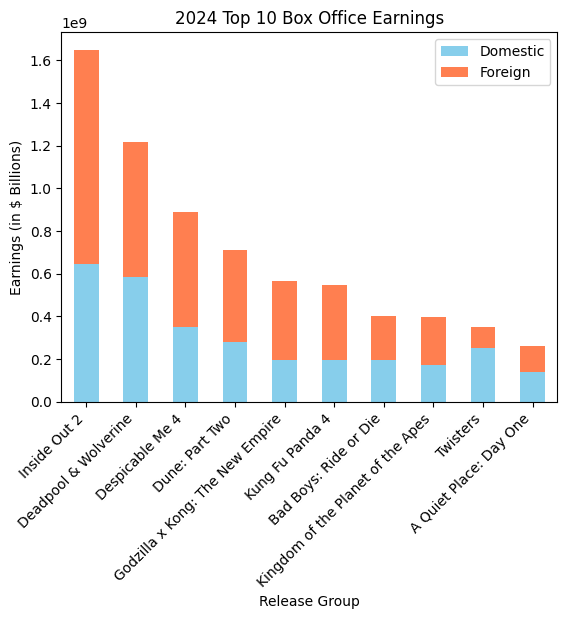

In [84]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['skyblue', 'coral']
imdb_top10.plot(x="Release Group", y=["Domestic", "Foreign"], kind="bar", stacked=True, color=colors)

plt.title("2024 Top 10 Box Office Earnings")
plt.ylabel("Earnings (in $ Billions)")
plt.xticks(rotation=45, ha='right')
plt.show()

In [96]:
imdb_top10['Domestic Percentage'] = imdb_top10['Domestic'] / imdb_top10['Worldwide'] * 100
imdb_top10['Foreign Percentage'] = imdb_top10['Foreign'] / imdb_top10['Worldwide'] * 100
imdb_top10

,Rank,Release Group,Worldwide,Domestic,Foreign,Domestic Percentage,Foreign Percentage
0,1,Inside Out 2,1650395307,647045450,1003349857,39.205483,60.794517
1,2,Deadpool & Wolverine,1217553325,582732869,634820456,47.860973,52.139027
2,3,Despicable Me 4,887608665,349667665,537941000,39.394350,60.605650
3,4,Dune: Part Two,711844358,282144358,429700000,39.635681,60.364319
4,5,Godzilla x Kong: The New Empire,567650016,196350016,371300000,34.589978,65.410022
5,6,Kung Fu Panda 4,548979132,193590620,355388512,35.263748,64.736252
6,7,Bad Boys: Ride or Die,402517230,193531836,208985394,48.080386,51.919614
7,8,Kingdom of the Planet of the Apes,397378150,171130165,226247985,43.064815,56.935185
8,9,Twisters,349080100,250380100,98700000,71.725687,28.274313
9,10,A Quiet Place: Day One,261564938,138930553,122634385,53.115129,46.884871


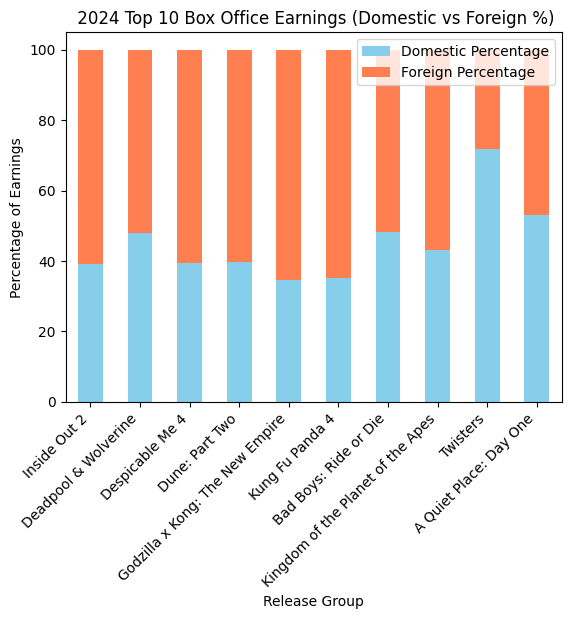

In [86]:
colors = ['skyblue', 'coral']
imdb_top10.plot(x="Release Group", y=["Domestic Percentage", "Foreign Percentage"], kind="bar", stacked=True, color=colors)

plt.title(" 2024 Top 10 Box Office Earnings (Domestic vs Foreign %)")
plt.ylabel("Percentage of Earnings")
plt.xticks(rotation=45, ha='right')
plt.show()

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

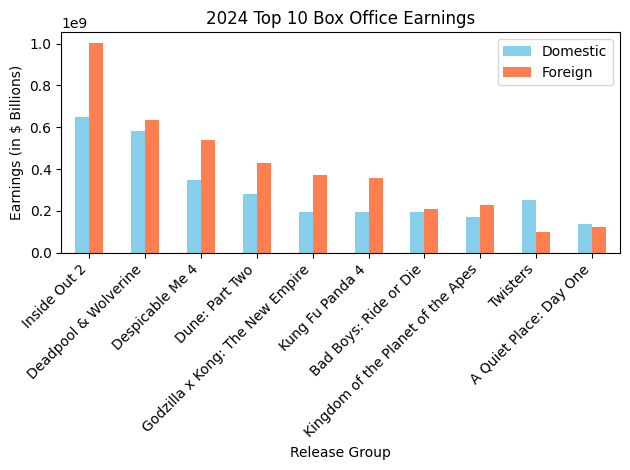

In [87]:
colors = ['skyblue', 'coral']
imdb_top10.plot(x="Release Group", y=["Domestic", "Foreign"], kind="bar", color=colors)

plt.title("2024 Top 10 Box Office Earnings")
plt.ylabel("Earnings (in $ Billions)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

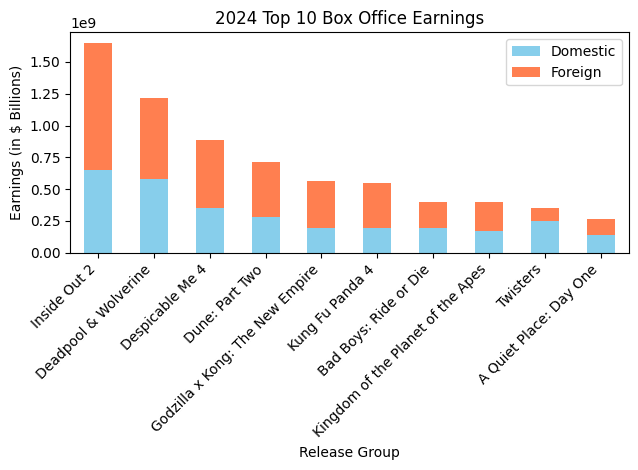

In [78]:
colors = ['skyblue', 'coral']
imdb_top10.plot(x="Release Group", y=["Domestic", "Foreign"], kind="bar", stacked=True, color=colors)

plt.title("2024 Top 10 Box Office Earnings")
plt.ylabel("Earnings (in $ Billions)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analysis

1. Web scrapping is used to collect data from the internet via Beautiful Soup, which in this case scrapping IMDB 2024 Worldwide Box Office earning numbers in USD `https://www.boxofficemojo.com/year/world/`
2. After data cleansing has been done, we can sort the top 10 Box Office numbers in 2024, in which the number box office earner in 2024 is `Inside Out 2` with around 1.6 Billion Dollars
3. Inside Out 2 earned the `biggest Domestic, Foreign and also combined Worldwide` Box Office numbers in 2024
4. The second spot is claimed by `Deadpool & Wolverine` with an earning of around 1.2 Billion Dollars
5. We can also make a new column for Domestic vs Foreign earning percentage, in which 8 out of 10 are earning >50% from the `Foreign Box Office`
6. We can see that 9 out of 10 from the Top 10 are `non original movies` (sequel or part of a movie universe)
7. The biggest percentage for `Domestic Box Office earner` is `Twisters` with 71.7% which is an original movie


### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

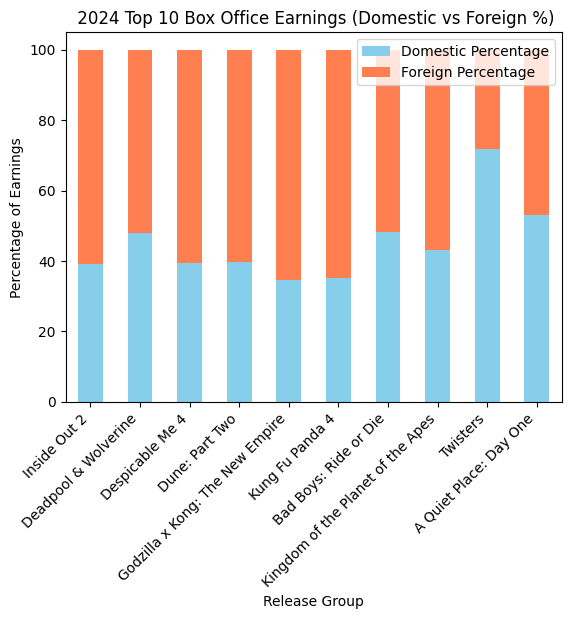

In [97]:
colors = ['skyblue', 'coral']
imdb_top10.plot(x="Release Group", y=["Domestic Percentage", "Foreign Percentage"], kind="bar", stacked=True, color=colors)

plt.title(" 2024 Top 10 Box Office Earnings (Domestic vs Foreign %)")
plt.ylabel("Percentage of Earnings")
plt.xticks(rotation=45, ha='right')
plt.show()